<a href="https://colab.research.google.com/github/mm230/test-live-coding/blob/master/Mouhamadou_Mansour_SOW_LogRegression_students_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [96]:
##### WRITE YOUR CODE HERE #####
path= '/content/drive/MyDrive/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [97]:
##### WRITE YOUR CODE HERE #####
data.head()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [98]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [99]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [100]:
##### WRITE YOUR CODE HERE #####
def Scale(data):
  mu = np.mean(data)
  std_data = np.std(data)
  data_Scaled = (data - mu)/std_data
  return data_Scaled
#### END CODE ####

Question 5: Scale your features, except the target. 

In [102]:
##### WRITE YOUR CODE HERE #####
data.iloc[:, :-1] = Scale(data.iloc[:, :-1])
data
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [103]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [104]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [113]:
class logistic_regression:
  def __init__(self, x_test, y_test, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters = num_iters
    self.threshold = threshold
    self.tolerance = tolerance
    self.lr = lr
    self.theta = None
    self.cost_history = []
    self.cost_history_test = []
    self.x_test = x_test
    self.y_test = y_test
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new= np.hstack([np.ones((x.shape[0], 1)), x])
    return x_new
    #### END CODE ####

  def sigmoid(self, x):
    #print(x.shape, self.theta.shape)
    ##### WRITE YOUR CODE HERE #####
    #self.theta = self.theta.reshape(-1, 1)
    z= x @ self.theta 

    return 1 /(1+np.exp(-z))
    #### END CODE ####

  def cross_entropy(self, x, y_true): 
    #print(x.shape, y_true.shape)
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    # x = self.add_ones(x)
    y_pred = self.sigmoid(x)
    Cost = - np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))/n
    print(Cost)
    return Cost # Scale if necessary
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.x_test= self.add_ones(self.x_test)
    self.y_test= self.y_test.reshape(-1, 1)

    self.theta= np.zeros((x.shape[1], 1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x) # using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T @ (y - y_pred)
      grad= grad.reshape(-1, 1) # Reshape, if it is needed
      
      # update rules
      self.theta= self.theta - self.lr * grad
      # print(self.theta.shape)
      # print('====')
      # Compute the training loss
      self.cost_history.append(self.cross_entropy(x, y))
      self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    result= [1 if i> self.threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
    return  result
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.plot(self.cost_history, label = "Train loss")
    plt.plot(self.cost_history_test, label = "Test loss")
    #### END CODE ####

In [114]:
# class logistic_regression:
#   def __init__(self,x_test,y_test, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
#     ##### WRITE YOUR CODE HERE #####
#     self.num_iters = num_iters
#     self.threshold = threshold
#     self.tolerance=tolerance
#     self.lr=lr
#     self.theta=None
#     self.cost_history= []
#     self.cost_history_test=[]
#     self.x_test=x_test
#     self.y_test=y_test
#     #### END CODE ####

#   def add_ones(self, x):
#     ##### WRITE YOUR CODE HERE #####
#     x_new= np.c_[np.ones((x.shape[0])),x]
#     return x_new
#     #### END CODE ####

#   def sigmoid(self, x, theta):
#     z= x@theta
#     sig = (1 / (1+ np.exp(z)))
#     return sig
#     #### END CODE ####

#   def cross_entropy(self, x, y_true):
#     ##### WRITE YOUR CODE HERE #####
#     n = x.shape[0] # Length of x
#     y_hat = self.sigmoid(x, self.theta)
#     Cost = -np.sum(y_true*np.log(y_hat)+(1-y_true)*np.log(1-y_hat))/len(x)
        
#     return Cost
#     #### END CODE ####

#   def fit(self, x,y):
#     ##### WRITE YOUR CODE HERE #####
#     x= self.add_ones(x) # Add ones to x
#     y= y.reshape(-1,1) # reshape y. This is optional, do it if needed

#     self.x_test= self.add_ones(self.x_test)
#     self.y_test= self.y_test.reshape(-1, 1)



#     self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
#     current_iter= 1
#     norm= 1

#     while (norm >= self.tolerance and current_iter < self.num_iters):
#       theta_old = self.theta.copy() # Get old theta

#       # make predictions
#       y_pred= self.sigmoid(x,self.theta) # using sigmoid function 

#       # Gradient of cross-entropy
#       grad= x.T@(y -y_pred)
#       grad= grad.reshape(-1,1) # Reshape, if it is needed

#       # update rules
#       self.theta= self.theta - self.lr * grad
#       # Compute the training loss
#       self.cost_history.append(self.cross_entropy(x,y))
#       self.cost_history_test.append(self.cross_entropy(self.x_test,self.y_test))

#       # Convergence criteria:
#       if current_iter%100 == 0:
#         print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
#       norm = np.linalg.norm(theta_old - self.theta)
#       current_iter += 1
#     #### END CODE ####
  
#   def predict(self, x):
#     proba= self.predict_proba(x) # Get probability of x
#     result= [1 if i> self.threshold else 0 for i in proba]  # Convert proba to 0 or 1. hint: list comprehension
#     return  result
  
    
#   def predict_proba(self, x):
#     x= self.add_ones(x) # Apply add ones to x
#     y_pred_prob=self.sigmoid(x,self.theta)  # Predict proba with sigmoid
#     return y_pred_prob
  
#   def plot(self):
#     ##### WRITE YOUR CODE HERE #####
#     plt.plot(self.cost_history, label='Train Losss')
#     plt.plot(self.cost_history_test, label='Test Losss')
#     plt.legend()
#     #### END CODE ####

In [115]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test, y_test, num_iters=10000)

In [116]:
%%time
model.fit(x_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
0.47901018979972165
0.4481530007258672
0.47901015997065605
0.4481529578935737
0.4790101301686671
0.448152915081381
0.47901010039372954
0.4481528722892737
0.47901007064581846
0.4481528295172365
0.4790100409249089
0.448152786765254
0.4790100112309756
0.44815274403331096
0.4790099815639939
0.4481527013213921
0.4790099519239385
0.4481526586294821
0.47900992231078493
0.44815261595756584
0.4790098927245079
0.44815257330562797
0.47900986316508265
0.44815253067365307
0.4790098336324842
0.4481524880616264
0.4790098041266879
0.44815244546953237
0.47900977464766886
0.44815240289735603
0.47900974519540235
0.44815236034508205
0.4790097157698635
0.44815231781269527
0.47900968637102764
0.44815227530018076
0.47900965699887005
0.4481522328075232
0.4790096276533659
0.4481521903347075
0.4790095983344907
0.44815214788171875
0.47900956904221964
0.44815210544854156
0.4790095397765283
0.4481520630351612
0.4790095105373919
0.4481520

In [117]:
pred= model.predict(x_test)

In [118]:
pred

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [119]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.0621027 ]
 [0.14364075]
 [0.16770029]
 [0.05649998]
 [0.68656307]
 [0.59077239]
 [0.24011922]
 [0.24245529]
 [0.03851676]
 [0.18856335]
 [0.04468985]
 [0.30989675]
 [0.6543891 ]
 [0.01782879]
 [0.64128438]
 [0.05287078]
 [0.37171023]
 [0.49402766]
 [0.341567  ]
 [0.07367515]
 [0.27098316]
 [0.47521352]
 [0.43470765]
 [0.19201003]
 [0.25107223]
 [0.80400819]
 [0.11154124]
 [0.42469167]
 [0.41338548]
 [0.20698992]
 [0.03079193]
 [0.92110075]
 [0.07050737]
 [0.40547424]
 [0.07062423]
 [0.46365743]
 [0.72786897]
 [0.44583131]
 [0.11584159]
 [0.9547328 ]
 [0.09357638]
 [0.26586146]
 [0.83754169]
 [0.91433131]
 [0.2087228 ]
 [0.07891804]
 [0.23721354]
 [0.71758088]
 [0.4111789 ]
 [0.35725047]
 [0.25488846]
 [0.67704974]
 [0.73545972]
 [0.02285975]
 [0.42272291]
 [0.18641832]
 [0.30398741]
 [0.77636051]
 [0.14298036]
 [0.91329833]
 [0.94938528]
 [0.38777932]
 [0.12882725]
 [0.06987208]
 [0.1692367 ]
 [0.0835011 ]
 [0.06106942]
 [0.0546371 ]
 [0.38977273]
 [0.54234849]
 [0.59467355]
 [0.50

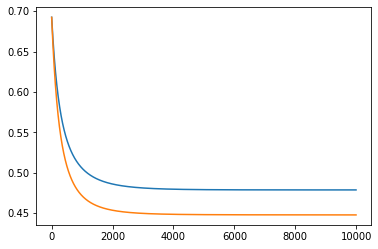

In [120]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [93]:
! git clone https://github.com/mm230/test-live-coding.git

Cloning into 'test-live-coding'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15 (delta 0), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [94]:
! git remote -v

fatal: not a git repository (or any of the parent directories): .git


Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

In [ ]:
!git status

In [ ]:
!git config user.email useremail
!git config user.name username

In [ ]:
!git add .
!git commit -m "Add my files"

In [ ]:
!git status

In [ ]:
!git push -u origin master --force

# If you cannot push, use:

In [ ]:
!git remote rm origin

In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

In [ ]:
!git push -u origin master --force

---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
class logistic_regression_l1:
  pass

In [ ]:
class logistic_regression_l2:
  pass

In [ ]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?